In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Exploratory Analysis of Animation Studio Dataset**


In [9]:
df = pd.read_csv("data/Animation_Movies.csv")

In [10]:
df_clean = df[df["production_countries"].notnull()]
df_clean["production_countries"]

0               United States of America
1               United States of America
2               United States of America
3               United States of America
4               United States of America
                      ...               
51937           United States of America
51939                          Argentina
51940                             Russia
51941                              Japan
51944    Bosnia and Herzegovina, Croatia
Name: production_countries, Length: 39700, dtype: object

In [11]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

In [19]:
from geopy.geocoders import Nominatim
from time import sleep

df_selected = df_clean[["title", "production_countries", "release_date", "production_companies"]]
df_selected["release_date"] = pd.to_datetime(df_selected["release_date"], errors='coerce')
df_selected = df_selected.dropna(subset=["release_date"])
df_selected["year"] = df_selected["release_date"].dt.year
df_selected["production_countries"] = df_selected["production_countries"].str.split(",")
df_selected = df_selected.explode("production_countries")
df_selected["production_countries"] = df_selected["production_countries"].str.strip()

country_year_group = df_selected.groupby(['production_countries', 'year']).agg(
    MovieCount=('title', 'count'),
    MovieList=('title', list)
).reset_index()

country_year_group.rename(columns={'production_countries': 'Country', 'year': 'Year'}, inplace=True)
country_year_group

unique_countries = country_year_group["Country"].drop_duplicates().to_frame()

geolocator = Nominatim(user_agent="animation_map")
latitudes = []
longitudes = []

for country in unique_countries["Country"]:
    try:
        location = geolocator.geocode(country)
        if location:
            latitudes.append(location.latitude)
            longitudes.append(location.longitude)
        else:
            latitudes.append(None)
            longitudes.append(None)
    except Exception:
        latitudes.append(None)
        longitudes.append(None)
    sleep(1)

unique_countries["lat"] = latitudes
unique_countries["lon"] = longitudes

country_year_group = country_year_group.merge(unique_countries, left_on="Country", right_on="Country", how="left")
country_year_group = country_year_group.dropna(subset=["lat", "lon"])
country_year_group

/var/folders/67/6c4p9l3d6gz7mdpq5tr7rk7w0000gn/T/ipykernel_76254/3134568996.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["release_date"] = pd.to_datetime(df_selected["release_date"], errors='coerce')


,Country,Year,MovieCount,MovieList,lat,lon
0,Afghanistan,1953,1,[Hello Paris],33.768006,66.238514
1,Afghanistan,2011,1,[Buz-e-Chini],33.768006,66.238514
2,Albania,1975,2,"[Zana and Miri, The Goose Maid]",5.758765,-73.915162
3,Albania,1976,2,"[Majlinda and the Little Bird, The Ear of Wheat]",5.758765,-73.915162
4,Albania,1985,1,[Headshoot],5.758765,-73.915162
...,...,...,...,...,...,...
3210,Yugoslavia,1997,1,[Sic transit gloria],23.041237,-81.526142
3211,Yugoslavia,2000,1,[Film with a Girl],23.041237,-81.526142
3212,Zimbabwe,2003,1,[The Legend of the Sky Kingdom],-18.455496,29.746841
3213,Zimbabwe,2013,1,[The Time Is... Now],-18.455496,29.746841


In [20]:
country_year_group.to_csv("/Users/bina/MoscowMickeyMule/data/movie_countries.csv", index=False)

In [12]:
df.head(1)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,...,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English


In [13]:
len(df)

51945

In [14]:
df.shape

(51945, 23)

In [15]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

**Basic Statistics**


In [16]:
print("Basic Statistics:")
print(df.describe(include='all'))

Basic Statistics:
                  id                   title  vote_average    vote_count  \
count   5.194500e+04                   51944  51945.000000  51945.000000   
unique           NaN                   49381           NaN           NaN   
top              NaN  Little Red Riding Hood           NaN           NaN   
freq             NaN                      15           NaN           NaN   
mean    6.188122e+05                     NaN      2.597083     40.395380   
std     3.479748e+05                     NaN      3.318748    482.705948   
min     1.200000e+01                     NaN      0.000000      0.000000   
25%     3.300810e+05                     NaN      0.000000      0.000000   
50%     6.119150e+05                     NaN      0.000000      0.000000   
75%     9.159040e+05                     NaN      6.000000      2.000000   
max     1.238314e+06                     NaN     10.000000  19463.000000   

          status release_date       revenue       runtime  adult  \
c

In [17]:
# Check for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                          0
title                       1
vote_average                0
vote_count                  0
status                      0
release_date             2137
revenue                     0
runtime                     0
adult                       0
backdrop_path           36110
budget                      0
homepage                43692
imdb_id                 22393
original_language           0
original_title              1
overview                 6079
popularity                  0
poster_path             14011
tagline                 47267
genres                      0
production_companies    22547
production_countries    12245
spoken_languages        18127
dtype: int64


In [18]:
df["budget"].iloc[-1]

0

In [19]:
type(df["budget"].iloc[-1])

numpy.int64

In [20]:
zero_count = (df["budget"] == 0).sum()
zero_count

50342

In [21]:
not_zero_count = (df["budget"] != 0).sum()
not_zero_count

1603

In [22]:
numeric_cols = df.select_dtypes(include=['number']).columns
print("Numerical columns:")
print(numeric_cols)


Numerical columns:
Index(['id', 'vote_average', 'vote_count', 'revenue', 'runtime', 'budget',
       'popularity'],
      dtype='object')


In [23]:
for col in numeric_cols:
    print(f"Zero's in {col}:")
    zero_count = (df[col] == 0).sum()
    print(zero_count)

Zero's in id:
0
Zero's in vote_average:
30789
Zero's in vote_count:
30779
Zero's in revenue:
50845
Zero's in runtime:
6301
Zero's in budget:
50342
Zero's in popularity:
963


The average vote is: 6.376700794100965
The median vote is: 6.452500000000001


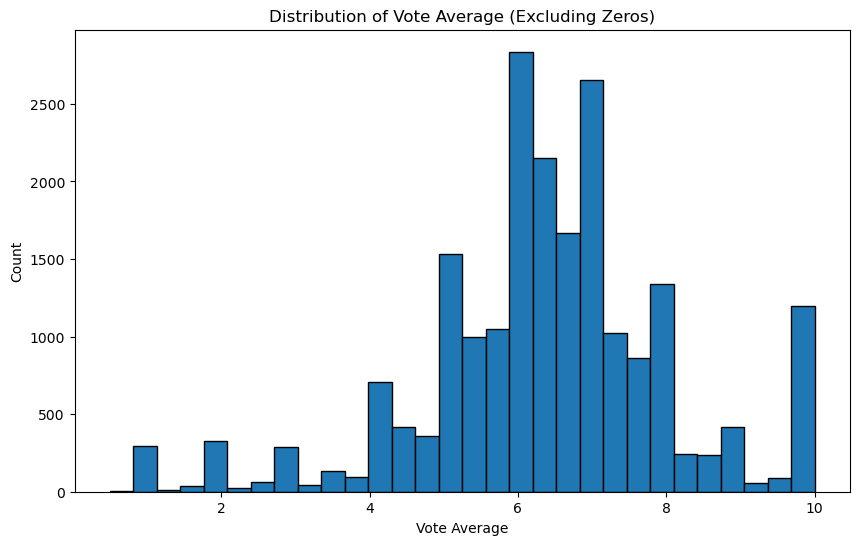

In [24]:
# Filter out rows where vote_average is 0
df_non_zero = df[df['vote_average'] != 0]

# Calculate the average vote
average_vote = df_non_zero['vote_average'].mean()
print("The average vote is:", average_vote)

average_vote = df_non_zero['vote_average'].median()
print("The median vote is:", average_vote)

# Create histogram for the distribution of vote_average without zeros
plt.figure(figsize=(10, 6))
plt.hist(df_non_zero['vote_average'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Vote Average (Excluding Zeros)')
plt.xlabel('Vote Average')
plt.ylabel('Count')

# Save the figure in high quality (300 dpi)
# plt.savefig("vote_average.png", format="png", dpi=300, bbox_inches='tight')
# plt.show()

plt.show()

In [25]:
df['production_companies']

0                              Pixar, Walt Disney Pictures
1                                                    Pixar
2                                                    Pixar
3                              Pixar, Walt Disney Pictures
4                              Pixar, Walt Disney Pictures
                               ...                        
51940                                                  NaN
51941    Benesse, Sony Music Direct, TOHO, The Answer S...
51942                                                  NaN
51943                                        Coronet Films
51944                             Studio Neum, Zagreb Film
Name: production_companies, Length: 51945, dtype: object

In [26]:
df['runtime'].max()

3720

In [27]:
df['runtime'] 

0         95
1         96
2        100
3        105
4         98
        ... 
51940      0
51941     60
51942     22
51943     12
51944     10
Name: runtime, Length: 51945, dtype: int64

In [28]:
df['runtime'].min()

0

In [29]:
runtime_counts = df['runtime'].value_counts()
print(runtime_counts.head(10))  # 

runtime
0     6301
7     4498
6     4208
3     3029
5     2998
4     2916
8     2459
2     2317
10    1968
1     1918
Name: count, dtype: int64


Movies left:
8062
The average runtime is: 82.90014884644009


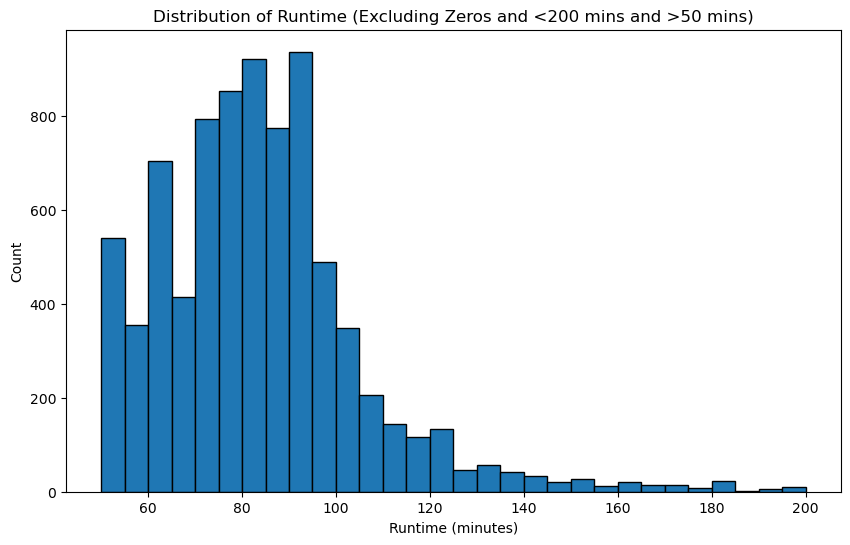

In [30]:
# Filter out rows 
df_filtered = df[(df['runtime'] != 0) & (df['runtime'] <= 200) & (df['runtime'] >= 50)]

print("Movies left:")
print(len(df_filtered))

average_runtime = df_filtered['runtime'].mean()
print("The average runtime is:", average_runtime)

plt.figure(figsize=(10, 6))
plt.hist(df_filtered['runtime'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Runtime (Excluding Zeros and <200 mins and >50 mins)')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')

# Save the figure in high quality (300 dpi)
# plt.savefig("runtime_distribution.png", format="png", dpi=300, bbox_inches='tight')
# plt.show()

plt.show()